# Importing the Required Libraries

In [28]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [29]:
#Loading the dataset
ecom_df = pd.read_csv(r"C:\Users\ual-laptop\Desktop\587\Project\grp01\MIS587_dataset.csv")

# Display the first few rows of the ecom dataframe
ecom_df.head()

,Row ID,Order ID,Order Date,Ship Date,color,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,...,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Promotion key,Promotion Description,Mode of Payment
0,1,US-2019-103800,3/1/2019,7/1/2019,white,Standard Class,DP-13000,Darren Powers,Replacement,United States,...,OFF-PA-10000174,Third Party,Paper,16.448,2,0.2,5.5512,NoPromotion,No discount,Wallet
1,2,US-2019-112326,4/1/2019,8/1/2019,blue,Standard Class,PO-19195,Phillina Ober,Other,United States,...,OFF-BI-10004094,Third Party,Binders,3.540,2,0.8,-5.4870,P80,80% discount,Wallet
2,3,US-2019-112326,4/1/2019,8/1/2019,blue,Standard Class,PO-19195,Phillina Ober,Other,United States,...,OFF-LA-10003223,Third Party,Labels,11.784,3,0.2,4.2717,NoPromotion,No discount,Wallet
3,4,US-2019-112326,4/1/2019,8/1/2019,yellow,Standard Class,PO-19195,Phillina Ober,Other,United States,...,OFF-ST-10002743,Third Party,Storage,272.736,3,0.2,-64.7748,NoPromotion,No discount,Wallet
4,5,US-2019-141817,5/1/2019,12/1/2019,purple,Standard Class,MB-18085,Mick Brown,Replacement,United States,...,OFF-AR-10003478,Third Party,Art,19.536,3,0.2,4.8840,NoPromotion,No discount,Debit Card


# Data Preprocessing

In [30]:
# remove - from Order ID, Customer ID and Product ID
ecom_df['Order ID'] = ecom_df['Order ID'].str.replace('-', '')
ecom_df['Customer ID'] = ecom_df['Customer ID'].str.replace('-', '')
ecom_df['Product ID'] = ecom_df['Product ID'].str.replace('-', '')

# Changing the column name as following: Country/Region to Country and State/Province to State
ecom_df = ecom_df.rename(columns = {'Country/Region':'Country', 'State/Province':'State'})

ecom_df.head()

,Row ID,Order ID,Order Date,Ship Date,color,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Promotion key,Promotion Description,Mode of Payment
0,1,US2019103800,3/1/2019,7/1/2019,white,Standard Class,DP13000,Darren Powers,Replacement,United States,...,OFFPA10000174,Third Party,Paper,16.448,2,0.2,5.5512,NoPromotion,No discount,Wallet
1,2,US2019112326,4/1/2019,8/1/2019,blue,Standard Class,PO19195,Phillina Ober,Other,United States,...,OFFBI10004094,Third Party,Binders,3.540,2,0.8,-5.4870,P80,80% discount,Wallet
2,3,US2019112326,4/1/2019,8/1/2019,blue,Standard Class,PO19195,Phillina Ober,Other,United States,...,OFFLA10003223,Third Party,Labels,11.784,3,0.2,4.2717,NoPromotion,No discount,Wallet
3,4,US2019112326,4/1/2019,8/1/2019,yellow,Standard Class,PO19195,Phillina Ober,Other,United States,...,OFFST10002743,Third Party,Storage,272.736,3,0.2,-64.7748,NoPromotion,No discount,Wallet
4,5,US2019141817,5/1/2019,12/1/2019,purple,Standard Class,MB18085,Mick Brown,Replacement,United States,...,OFFAR10003478,Third Party,Art,19.536,3,0.2,4.8840,NoPromotion,No discount,Debit Card


In [31]:
# Checking for any duplicate rows
duplicate_rows = ecom_df.duplicated().sum()

# Summary of the dataset
dataset_summary = {
    "Total Rows": len(ecom_df),
    "Total Columns": len(ecom_df.columns),
    "Duplicate Rows": duplicate_rows
}

# Removing duplicate rows
ecom_df = ecom_df.drop_duplicates()

# Displaying summary of dataset
dataset_summary

{'Total Rows': 10205, 'Total Columns': 24, 'Duplicate Rows': 11}

In [32]:
# Removing duplicate rows
df_modified = ecom_df.drop_duplicates()

print(f"Number of duplicate rows: {df_modified.duplicated().sum()}")

Number of duplicate rows: 0


In [33]:
# Calculate descriptive statistics for the selected categorical attributes
categorical_descriptives = df_modified[['Ship Mode', 'Segment', 'Category']].describe(include=[object])

# Calculate descriptive statistics for the selected numerical attributes
numerical_descriptives = df_modified[['Sales', 'Quantity', 'Profit']].describe()

# Displaying descriptive statistics
categorical_descriptives, numerical_descriptives

(             Ship Mode      Segment     Category
 count            10194        10194        10194
 unique               4            3            4
 top     Standard Class  Replacement  Third Party
 freq              6120         5281         5521,
               Sales      Quantity        Profit
 count  10194.000000  10194.000000  10194.000000
 mean     228.225854      3.791838     28.673417
 std      619.906839      2.228317    232.465115
 min        0.444000      1.000000  -6599.978000
 25%       17.220000      2.000000      1.760800
 50%       53.910000      3.000000      8.690000
 75%      209.500000      5.000000     29.297925
 max    22638.480000     14.000000   8399.976000)

# Exploratory Data Analysis

In [34]:
# Calculate metrics
# Count of each categorical attribute
count_segment = df_modified['Segment'].count()
count_category = df_modified['Category'].count()
count_sub_category = df_modified['Sub-Category'].count()

# Mean sales
mean_sales = df_modified['Sales'].mean()

# Standard deviation of profit
std_profit = df_modified['Profit'].std()

# Median quantity
median_quantity = df_modified['Quantity'].median()

# Number of unique values for geographical attributes
unique_states = df_modified['State'].nunique()
unique_cities = df_modified['City'].nunique()

# Output the calculated metrics
print(f"Count of Segment: {count_segment}")
print(f"Count of Category: {count_category}")
print(f"Count of Sub-Category: {count_sub_category}")
print(f"Mean of Sales: {mean_sales}")
print(f"Standard Deviation of Profit: {std_profit}")
print(f"Median of Quantity: {median_quantity}")
print(f"Unique States: {unique_states}")
print(f"Unique Cities: {unique_cities}")

Count of Segment: 10194
Count of Category: 10194
Count of Sub-Category: 10194
Mean of Sales: 228.22585386501862
Standard Deviation of Profit: 232.46511505662124
Median of Quantity: 3.0
Unique States: 59
Unique Cities: 542


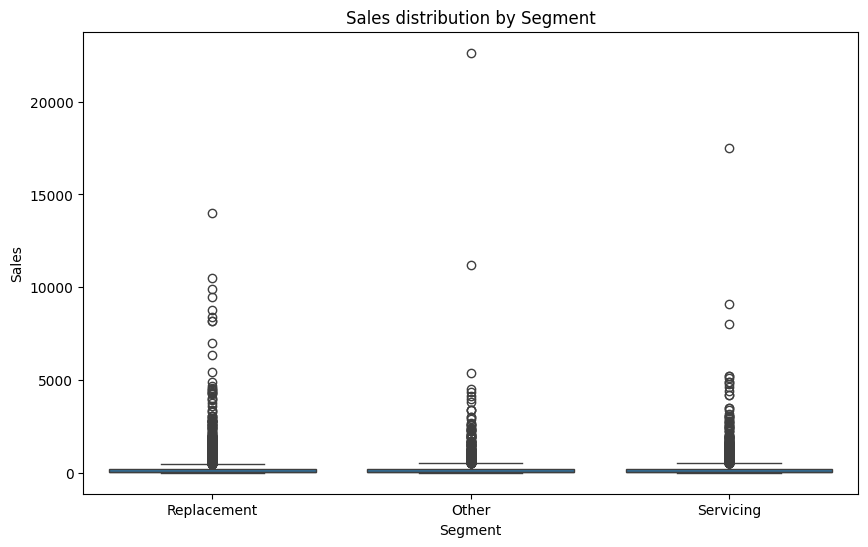

In [35]:
# Visual 1: Sales distribution by Segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Sales', data=df_modified)
plt.title('Sales distribution by Segment')
plt.ylabel('Sales')
plt.xlabel('Segment')
plt.show()

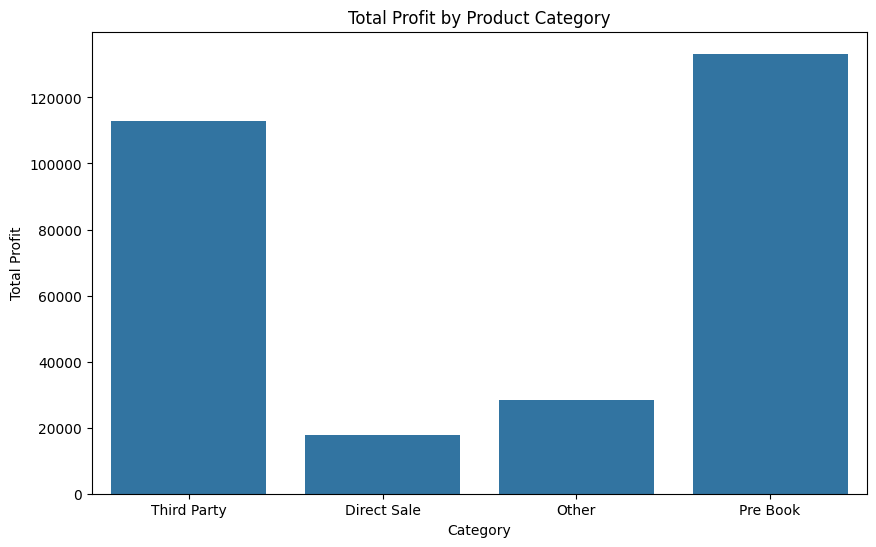

In [36]:
# Visual 2: Profitability of different product categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=df_modified, estimator=sum, errorbar=None)
plt.title('Total Profit by Product Category')
plt.ylabel('Total Profit')
plt.xlabel('Category')
plt.show()


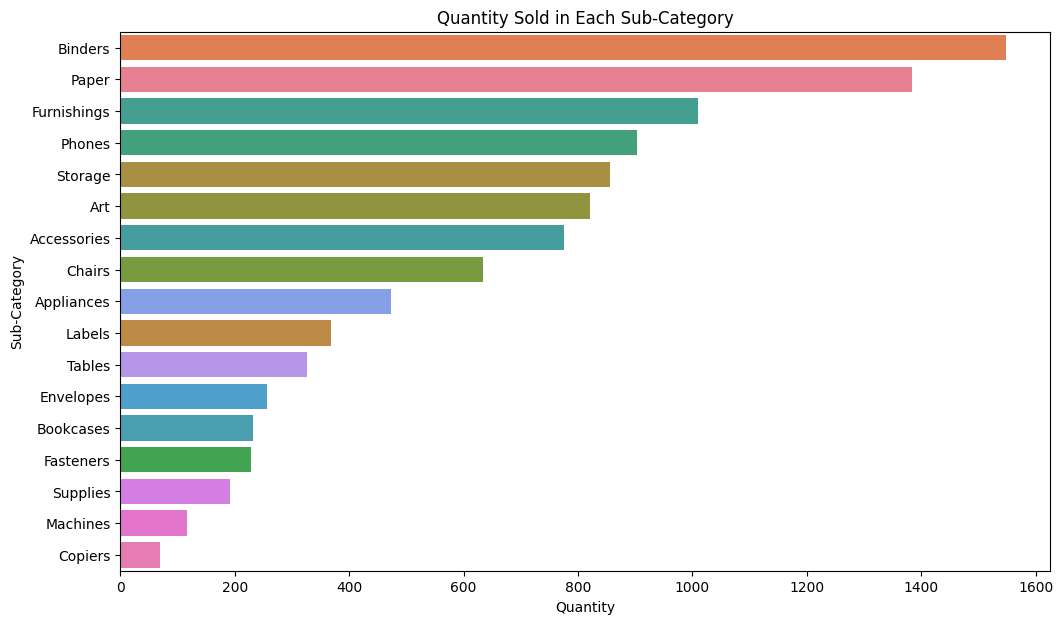

In [37]:
# Visual 3: Quantity sold in each sub-category
plt.figure(figsize=(12, 7))
sns.countplot(y='Sub-Category', data=df_modified, order = ecom_df['Sub-Category'].value_counts().index,hue='Sub-Category')
plt.title('Quantity Sold in Each Sub-Category')
plt.xlabel('Quantity')
plt.ylabel('Sub-Category')
plt.show()

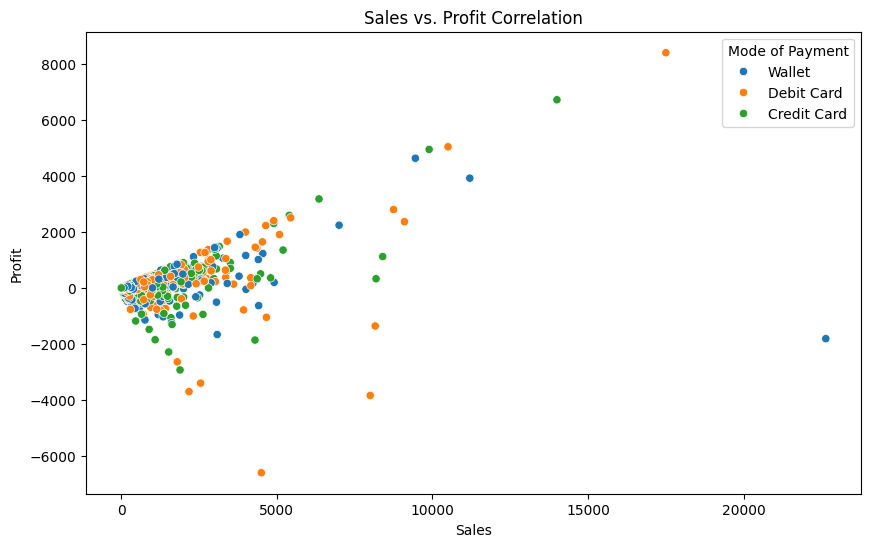

In [38]:
#Visual 4: Scatter Plot of Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df_modified,hue='Mode of Payment')
plt.title('Sales vs. Profit Correlation')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

In [39]:
# Displaying missing values
print("N/A values:")
print(df_modified.isna().sum())

N/A values:
Row ID                   0
Order ID                 0
Order Date               0
Ship Date                0
color                    0
Ship Mode                0
Customer ID              0
Customer Name            0
Segment                  0
Country                  0
City                     0
State                    0
Postal Code              0
Region                   0
Product ID               0
Category                 0
Sub-Category             0
Sales                    0
Quantity                 0
Discount                 0
Profit                   0
Promotion key            0
Promotion Description    0
Mode of Payment          0
dtype: int64


In [40]:
# Displaying missing values
print("Missing values:")
print(df_modified.isnull().sum())

Missing values:
Row ID                   0
Order ID                 0
Order Date               0
Ship Date                0
color                    0
Ship Mode                0
Customer ID              0
Customer Name            0
Segment                  0
Country                  0
City                     0
State                    0
Postal Code              0
Region                   0
Product ID               0
Category                 0
Sub-Category             0
Sales                    0
Quantity                 0
Discount                 0
Profit                   0
Promotion key            0
Promotion Description    0
Mode of Payment          0
dtype: int64


# As, there are no Null/ N/A values, for future any future possibilities of discripencies below is the code to remove them.

In [41]:
# Drop rows with missing values
df_modified = df_modified.dropna()

# Handling Missing Values
# This part is little bit tricky
# As, imputing numerical missing values needs understanding and better judgement whether to impute or remove the data.

# Analyzing the data at product level; just removing them.

In [42]:
# Detecting and Removing Anomalies and Outliers
# Function to remove outliers based on the IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Applying the function to the 'Sales' and 'Profit' columns
df_clean = remove_outliers(df_modified, 'Sales')
df_clean = remove_outliers(df_modified, 'Profit')


# Filter data by considering zscores
df_clean['Sales_zscore'] = zscore(df_clean['Sales'])
df_clean = df_clean[df_clean['Sales_zscore'].abs() <= 3]  # Filtering using Z-score threshold

# Verifying and displaying the changes
print(df_clean.info())
print(df_clean.head())

<class 'pandas.core.frame.DataFrame'>
Index: 8081 entries, 0 to 10204
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Row ID                 8081 non-null   int64  
 1   Order ID               8081 non-null   object 
 2   Order Date             8081 non-null   object 
 3   Ship Date              8081 non-null   object 
 4   color                  8081 non-null   object 
 5   Ship Mode              8081 non-null   object 
 6   Customer ID            8081 non-null   object 
 7   Customer Name          8081 non-null   object 
 8   Segment                8081 non-null   object 
 9   Country                8081 non-null   object 
 10  City                   8081 non-null   object 
 11  State                  8081 non-null   object 
 12  Postal Code            8081 non-null   object 
 13  Region                 8081 non-null   object 
 14  Product ID             8081 non-null   object 
 15  Category

C:\Users\ual-laptop\AppData\Local\Temp\ipykernel_22496\743690312.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sales_zscore'] = zscore(df_clean['Sales'])


In [45]:
print(df_clean.dtypes)

Row ID                     int64
Order ID                  object
Order Date                object
Ship Date                 object
color                     object
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country                   object
City                      object
State                     object
Postal Code               object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Promotion key             object
Promotion Description     object
Mode of Payment           object
Sales_zscore             float64
dtype: object


In [46]:
# Droping some column that are not needed
df_cleaned = df_clean.drop(columns=['Row ID','Sales_zscore'])

In [47]:
# show duplicate rows where only Order ID and Product ID are same and keep=False to show all duplicates and count them
duplicate_rows = df_cleaned[df_cleaned.duplicated(subset=['Order ID', 'Product ID'], keep=False)]
duplicate_rows_count = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {duplicate_rows_count}")
print(df_cleaned.shape)

Number of duplicate rows: 14
(8081, 23)


# There are certain discrepansies in the dataset where Order ID and Product ID were same but quantity and color are different, to keep data clean as there are only a few instances of it those can be removing them.

In [48]:
# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates(subset=['Order ID', 'Product ID'])

# Display the shape of the cleaned dataset
df_cleaned.shape

(8074, 23)